In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file

In [2]:
file_name = './CWoLa_Hunting_Hidden_Valley_training_results.csv'
df = pd.read_csv(file_name)

# ACC curve

In [3]:
def plot_acc_curve(sample_type_format, madol_name_format, sensitivity_range, color, **kwargs):
    ACC, std = [], []
    for sensitivity in sensitivity_range:
        
        sample_type = sample_type_format.format(sensitivity)
        model_name = madol_name_format.format(sensitivity)
        row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
        
        ACC.append(df[row]['ACC-true'].mean())
        std.append(df[row]['ACC-true'].std())

    # plot no signal sample ACC with error bar
    ax.axhline(y=ACC[0], color=color, linestyle='--', label='No signal sample')
    ax.axhspan(ACC[0] - std[0], ACC[0] + std[0], facecolor='gray', alpha=0.3, label='Shaded Band')
    
    ax.errorbar(sensitivity_range, ACC, yerr=std, marker='o', label='ACC')

## Old samples

In [3]:
ACC, std = [], []

sensitivities = range(1,11)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC.append(df[row]['ACC-true'].mean())
    std.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0') & (df['Model Name'] == 'SB_0.0')
no_sig_acc = df[row]['ACC-true'].mean()
no_sig_std = df[row]['ACC-true'].std()

In [4]:
ACC_aug_1, std_aug_1 = [], []

sensitivities_aug_1 = range(1,11)

for id, sensitivity in enumerate(sensitivities_aug_1):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 1'
    model_name = f'SB_{sensitivity:.1f}_aug_1'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_aug_1.append(df[row]['ACC-true'].mean())
    std_aug_1.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0, Augmentation: 1') & (df['Model Name'] == 'SB_0.0_aug_1')
no_sig_acc_aug_1 = df[row]['ACC-true'].mean()
no_sig_std_aug_1 = df[row]['ACC-true'].std()

In [5]:
ACC_aug_3, std_aug_3 = [], []

sensitivities_aug_3 = range(1,11)

for id, sensitivity in enumerate(sensitivities_aug_3):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 3'
    model_name = f'SB_{sensitivity:.1f}_aug_3'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_aug_3.append(df[row]['ACC-true'].mean())
    std_aug_3.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0, Augmentation: 1') & (df['Model Name'] == 'SB_0.0_aug_3')
no_sig_acc_aug_3 = df[row]['ACC-true'].mean()
no_sig_std_aug_3 = df[row]['ACC-true'].std()

In [6]:
ACC_x2, std_x2 = [], []

sensitivities_x2 = range(1,11)

for id, sensitivity in enumerate(sensitivities_x2):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Luminosity: x2'
    model_name = f'SB_{sensitivity:.1f}_x2'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_x2.append(df[row]['ACC-true'].mean())
    std_x2.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0, Augmentation: 1') & (df['Model Name'] == 'SB_0.0_x2')
no_sig_acc_x2 = df[row]['ACC-true'].mean()
no_sig_std_x2 = df[row]['ACC-true'].std()

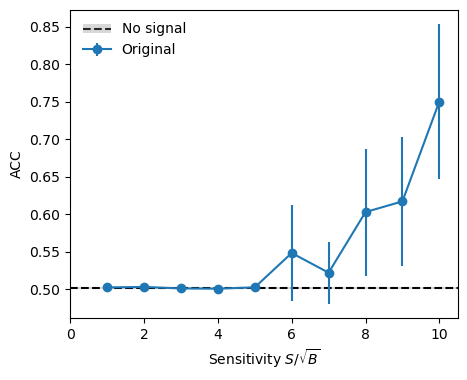

In [7]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')


ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), handles[2] ]
labels = ['No signal', labels[2]]
ax.legend(handles, labels, frameon=False, loc='upper left')

# plt.savefig('../figures/HVmodel_CWoLa_CNN.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

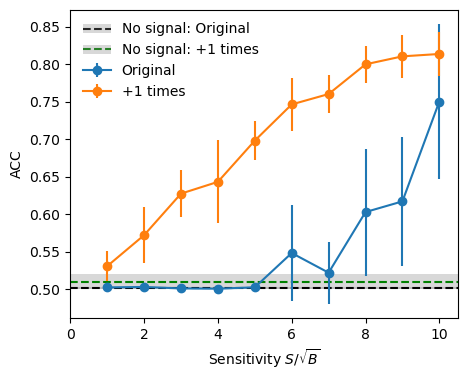

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_1, color='g', linestyle='--', label='No signal: +1 times')
ax.axhspan(no_sig_acc_aug_1 - no_sig_std_aug_1, no_sig_acc_aug_1 + no_sig_std_aug_1, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')
ax.errorbar(sensitivities_aug_1, ACC_aug_1, yerr=std_aug_1, marker='o', label='+1 times')


ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), *handles[4:]]
labels = ['No signal: Original', 'No signal: +1 times', *labels[4:]]
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

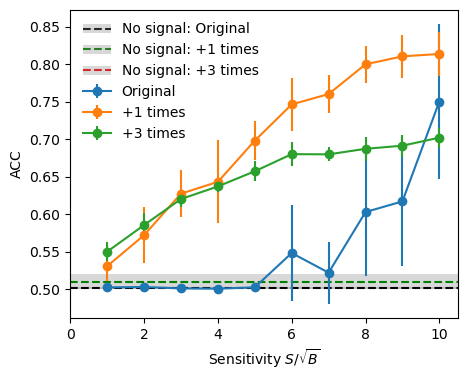

In [9]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_1, color='g', linestyle='--', label='No signal: +1 times')
ax.axhspan(no_sig_acc_aug_1 - no_sig_std_aug_1, no_sig_acc_aug_1 + no_sig_std_aug_1, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_3, color='r', linestyle='--', label='No signal: +3 times')
ax.axhspan(no_sig_acc_aug_3 - no_sig_std_aug_3, no_sig_acc_aug_3 + no_sig_std_aug_3, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')
ax.errorbar(sensitivities_aug_1, ACC_aug_1, yerr=std_aug_1, marker='o', label='+1 times')
ax.errorbar(sensitivities_aug_3, ACC_aug_3, yerr=std_aug_3, marker='o', label='+3 times')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:], ]
labels = ['No signal: Original', 'No signal: +1 times', 'No signal: +3 times', *labels[6:]]
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_3.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

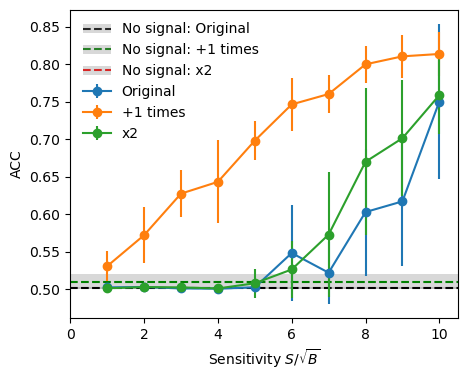

In [7]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_1, color='g', linestyle='--', label='No signal: +1 times')
ax.axhspan(no_sig_acc_aug_1 - no_sig_std_aug_1, no_sig_acc_aug_1 + no_sig_std_aug_1, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_x2, color='r', linestyle='--', label='No signal: x2')
ax.axhspan(no_sig_acc_x2 - no_sig_std_x2, no_sig_acc_x2 + no_sig_std_x2, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')
ax.errorbar(sensitivities_aug_1, ACC_aug_1, yerr=std_aug_1, marker='o', label='+1 times')
ax.errorbar(sensitivities_x2, ACC_x2, yerr=std_x2, marker='o', label='x2')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 times', 'No signal: x2', *labels[6:]]
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_x2.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Re-process sample

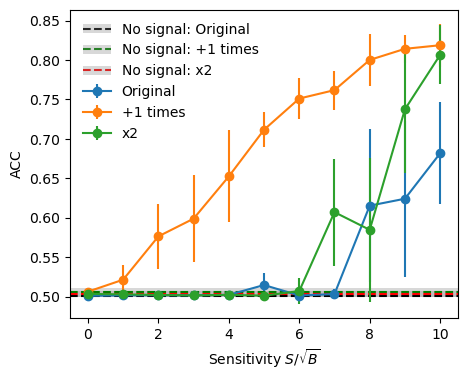

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(11), 'g')
plot_acc_curve('Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(11), 'r')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 times', 'No signal: x2', 'Original', '+1 times', 'x2']

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_x2_re-process.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

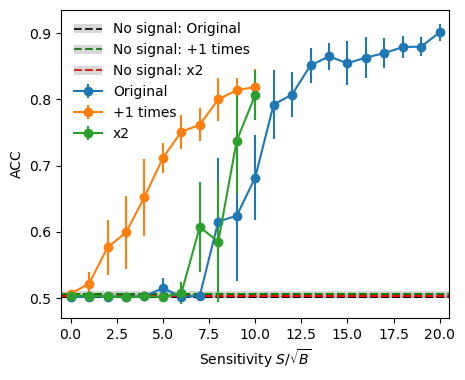

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(21), 'k')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(11), 'g')
plot_acc_curve('Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(11), 'r')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 20.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 times', 'No signal: x2', 'Original', '+1 times', 'x2']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_sensitivity_11_20.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

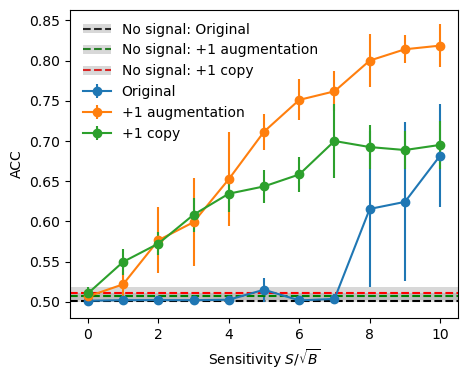

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(11), 'g')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(11), 'r')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 augmentation', 'No signal: +1 copy', 'Original', '+1 augmentation', '+1 copy']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_copy_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

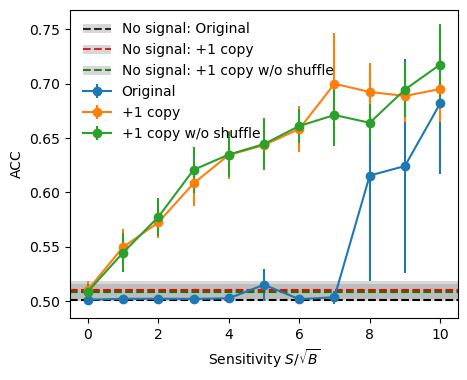

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(11), 'r')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1, No shuffle', 'SB_{:.1f}_copy_1_no_shuffle_new', range(11), 'g')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 copy', 'No signal: +1 copy w/o shuffle',  'Original', '+1 copy', '+1 copy w/o shuffle']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_1_wo_shuffle.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

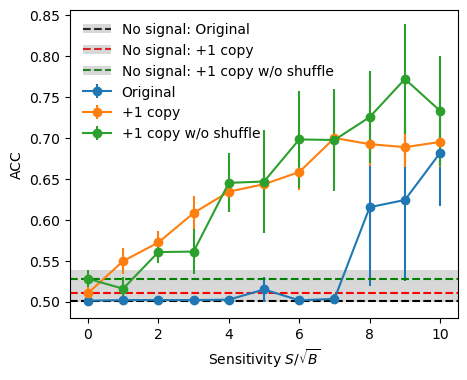

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(11), 'r')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1, No shuffle', 'SB_{:.1f}_copy_1_no_shuffle_code', range(11), 'g')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 copy', 'No signal: +1 copy w/o shuffle',  'Original', '+1 copy', '+1 copy w/o shuffle']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_1_wo_shuffle_code.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

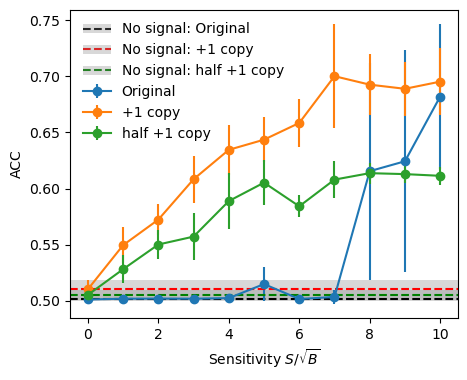

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(11), 'r')
plot_acc_curve('Sensitivity: {:.1f}, Half, Copy: 1', 'SB_{:.1f}_half_copy_1', range(11), 'g')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 copy', 'No signal: half +1 copy',  'Original', '+1 copy', 'half +1 copy']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_half_copy_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

In [11]:
AUC, std = [], []
AUC_aug_1, std_aug_1 = [], []
AUC_x2, std_x2 = [], []

sensitivities = range(11)

for sensitivity in sensitivities:
    
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}_new'
    mu, sigma = get_auc_mu_std(df, sample_type, model_name)

    AUC.append(mu)
    std.append(sigma)

    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 1'
    model_name = f'SB_{sensitivity:.1f}_aug_1_new'
    mu, sigma = get_auc_mu_std(df, sample_type, model_name)
    
    AUC_aug_1.append(mu)
    std_aug_1.append(sigma)

    sample_type = f'Sensitivity: {sensitivity:.1f}, Luminosity: x2'
    model_name = f'SB_{sensitivity:.1f}_x2_new'
    mu, sigma = get_auc_mu_std(df, sample_type, model_name)
    
    AUC_x2.append(mu)
    std_x2.append(sigma)

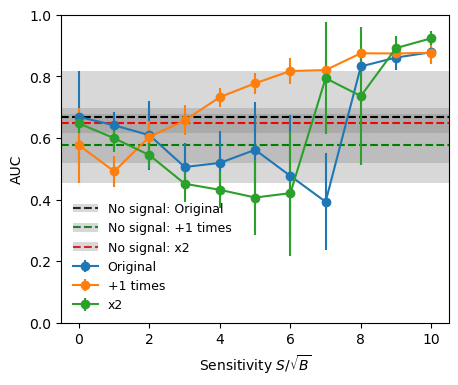

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
# plot no signal sample ACC with error bar
ax.axhline(y=AUC[0], color='k', linestyle='--', label='No signal sample')
ax.axhspan(AUC[0] - std[0], AUC[0] + std[0], facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=AUC_aug_1[0], color='g', linestyle='--', label='No signal: +1 times')
ax.axhspan(AUC_aug_1[0] - std_aug_1[0], AUC_aug_1[0] + std_aug_1[0], facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=AUC_x2[0], color='r', linestyle='--', label='No signal: x2')
ax.axhspan(AUC_x2[0] - std_x2[0], AUC_x2[0] + std_x2[0], facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, AUC, yerr=std, marker='o', label='Original')
ax.errorbar(sensitivities, AUC_aug_1, yerr=std_aug_1, marker='o', label='+1 times')
ax.errorbar(sensitivities, AUC_x2, yerr=std_x2, marker='o', label='x2')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('AUC')

ax.set_xlim(-0.5, 10.5)
ax.set_ylim(0, 1)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: Original', 'No signal: +1 times', 'No signal: x2', *labels[6:]]
ax.legend(handles, labels, frameon=False, fontsize=9)

# plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_x2.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Only augmented sample

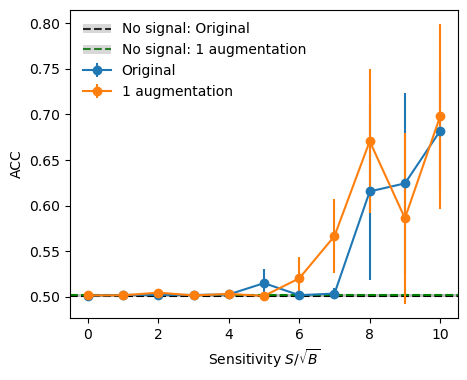

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}, Only Augmentation: 1', 'SB_{:.1f}_only_aug_1_new', range(11), 'g')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), *handles[4:],]
labels = ['No signal: Original', 'No signal: 1 augmentation', 'Original', '1 augmentation']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_only_aug_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

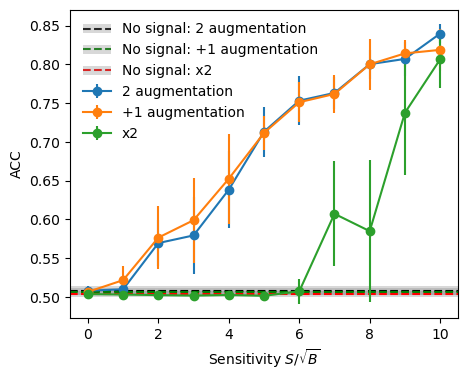

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Only Augmentation: 2', 'SB_{:.1f}_only_aug_2_new', range(11), 'k')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(11), 'g')
plot_acc_curve('Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(11), 'r')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:],]
labels = ['No signal: 2 augmentation ', 'No signal: +1 augmentation', 'No signal: x2', '2 augmentation', '+1 augmentation', 'x2']
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_only_aug_2.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Smearing scale

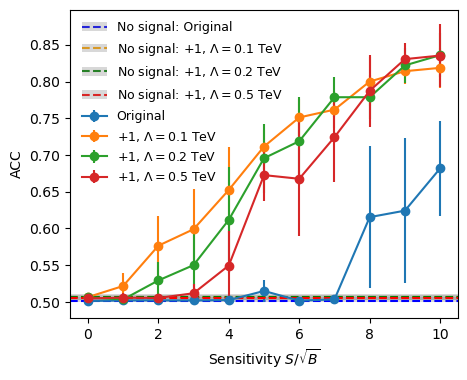

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(11), 'orange')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1, Smearing: 0.2', 'SB_{:.1f}_aug_1_std_02_new', range(11), 'g')
plot_acc_curve('Sensitivity: {:.1f}, Augmentation: 1, Smearing: 0.5', 'SB_{:.1f}_aug_1_std_05_new', range(11), 'r')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), (handles[6], handles[7]), *handles[8:],]
labels = ['No signal: Original', 'No signal: +1, $\Lambda=0.1$ TeV', 'No signal: +1, $\Lambda=0.2$ TeV', 'No signal: +1, $\Lambda=0.5$ TeV',
        'Original', '+1, $\Lambda=0.1$ TeV', '+1, $\Lambda=0.2$ TeV', '+1, $\Lambda=0.5$ TeV']

ax.legend(handles, labels, frameon=False, fontsize=9, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_std_01_02_05.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Original + $x$ Copy, $x =0\sim 1$

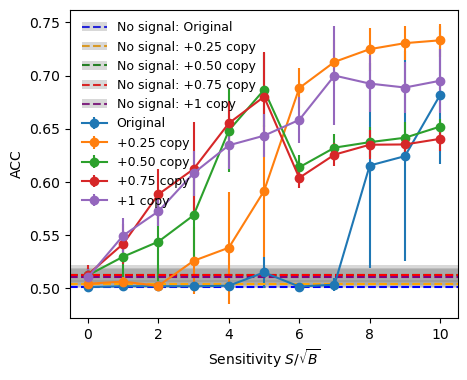

In [14]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 0.25', 'SB_{:.1f}_copy_0.25', range(11), 'orange')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 0.5', 'SB_{:.1f}_copy_0.5', range(11), 'g')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 0.75', 'SB_{:.1f}_copy_0.75', range(11), 'r')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(11), 'purple')


ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original',
          'No signal: +0.25 copy',
          'No signal: +0.50 copy',
          'No signal: +0.75 copy',
          'No signal: +1 copy',
          'Original',
          '+0.25 copy',
          '+0.50 copy',
          '+0.75 copy',
          '+1 copy',]
ax.legend(handles, labels, frameon=False, fontsize=9, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_ratio.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Remove swapping label

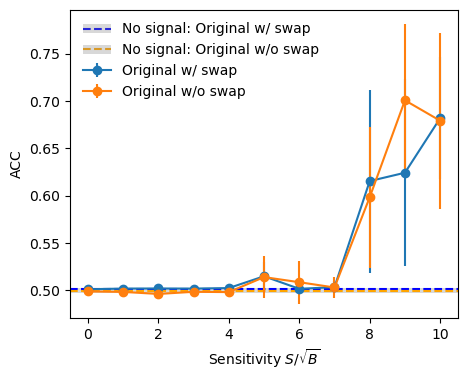

In [26]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original w/ swap',
          'No signal: Original w/o swap',
          'Original w/ swap',
          'Original w/o swap',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_no_swap.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

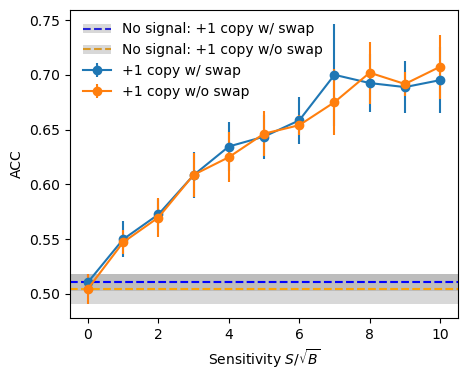

In [27]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = [
          'No signal: +1 copy w/ swap', 
          'No signal: +1 copy w/o swap', 
          '+1 copy w/ swap',
          '+1 copy w/o swap',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_1_no_swap.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

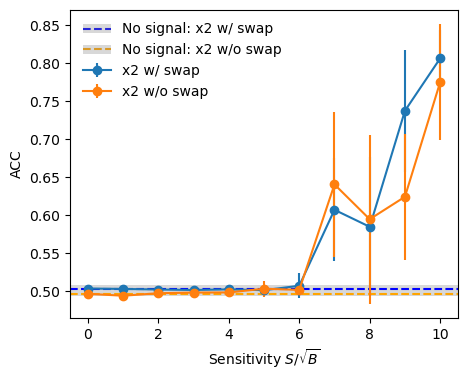

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_no_swap', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: x2 w/ swap',
          'No signal: x2 w/o swap',
          'x2 w/ swap',
          'x2 w/o swap',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_x2_no_swap.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Change model structure

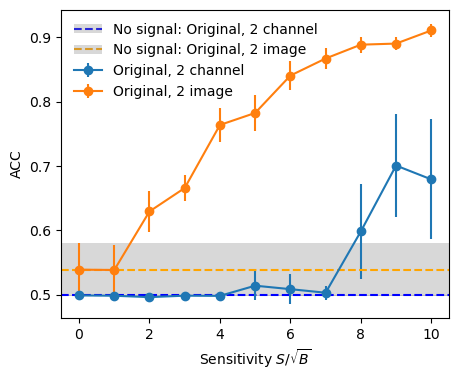

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_2_image', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original, 2 channel',
          'No signal: Original, 2 image',
          'Original, 2 channel',
          'Original, 2 image',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_ZN_model.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

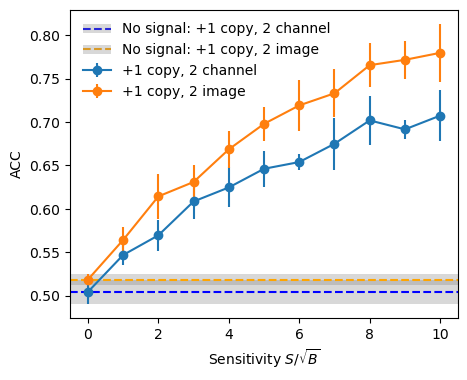

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: +1 copy, 2 channel',
          'No signal: +1 copy, 2 image',
          '+1 copy, 2 channel',
          '+1 copy, 2 image',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_1_ZN_model.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

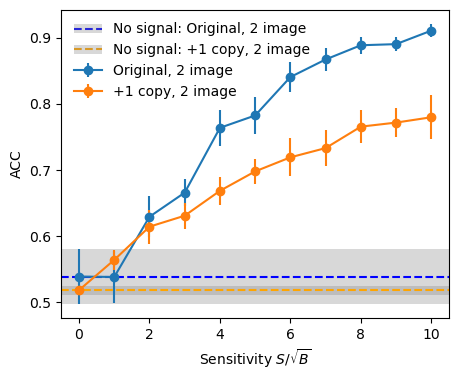

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_2_image', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original, 2 image',
          'No signal: +1 copy, 2 image',
          'Original, 2 image',
          '+1 copy, 2 image',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_copy_1_ZN_model.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Tensorflow version

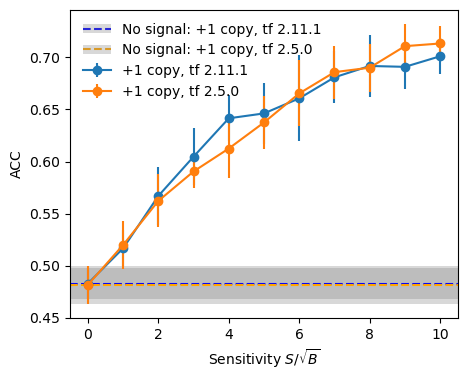

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap_2_image', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image_tf2.5', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: +1 copy, tf 2.11.1',
          'No signal: +1 copy, tf 2.5.0',
          '+1 copy, tf 2.11.1',
          '+1 copy, tf 2.5.0',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_copy_1_tf_250.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Early stopping patience

/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


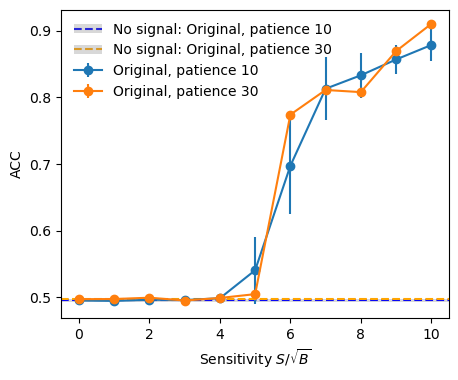

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
# plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap_2_image', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_2_image_patience_30', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original, patience 10',
          'No signal: Original, patience 30',
          'Original, patience 10',
          'Original, patience 30',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_patience_30.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


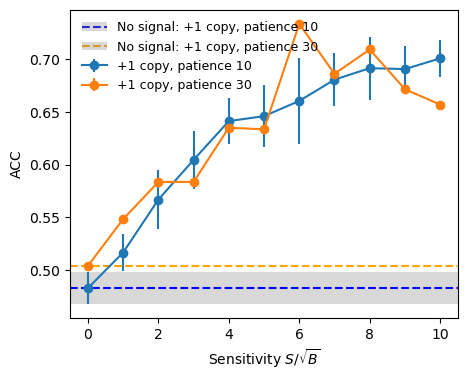

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap_2_image', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image_patience_30', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: +1 copy, patience 10',
          'No signal: +1 copy, patience 30',
          '+1 copy, patience 10',
          '+1 copy, patience 30',
          ]

ax.legend(handles, labels, fontsize = 9, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_1_patience_30.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/r10222035/.conda/envs/jupyter/lib/python3.8/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


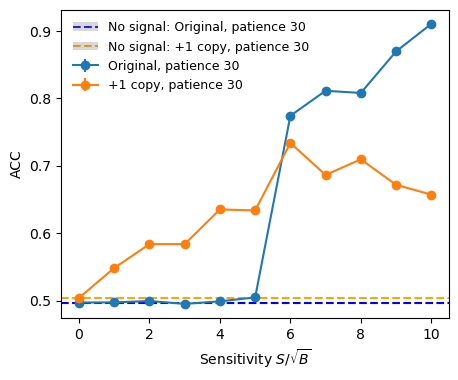

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_2_image_patience_30', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image_patience_30', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original, patience 30',
          'No signal: +1 copy, patience 30',
          'Original, patience 30',
          '+1 copy, patience 30',
          ]

ax.legend(handles, labels, fontsize = 9, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_copy_1_patience_30.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Resolution $25 \times 25$

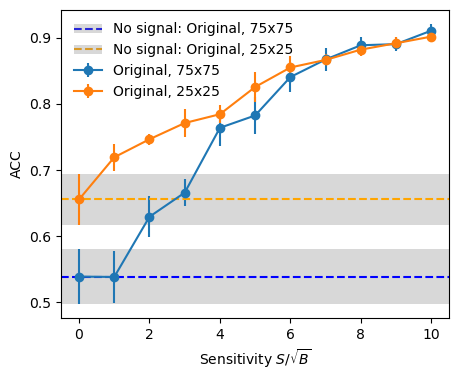

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}', 'SB_{:.1f}_2_image', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Resolution: 25x25', 'SB_{:.1f}_2_image_25x25', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original, 75x75',
          'No signal: Original, 25x25',
          'Original, 75x75',
          'Original, 25x25',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

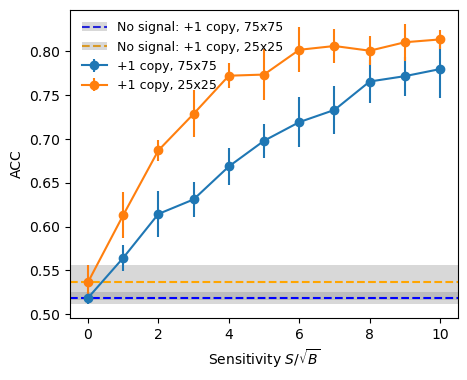

In [13]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Resolution: 25x25, Copy: 1', 'SB_{:.1f}_copy_1_2_image_25x25', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: +1 copy, 75x75',
          'No signal: +1 copy, 25x25',
          '+1 copy, 75x75',
          '+1 copy, 25x25',
          ]

ax.legend(handles, labels, fontsize = 9, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_copy_1_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

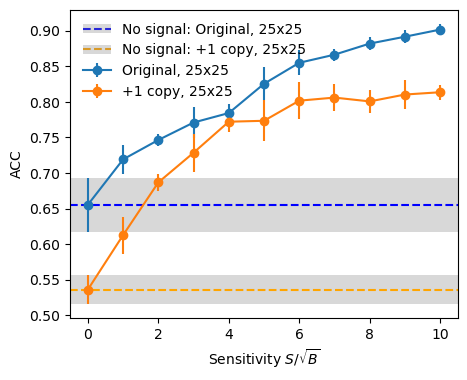

In [14]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

plot_acc_curve('Sensitivity: {:.1f}, Resolution: 25x25', 'SB_{:.1f}_2_image_25x25', range(11), 'b')
plot_acc_curve('Sensitivity: {:.1f}, Resolution: 25x25, Copy: 1', 'SB_{:.1f}_copy_1_2_image_25x25', range(11), 'orange')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(-.5, 10.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 3
handles = [(handles[2*i], handles[2*i+1]) for i in range(n)] + [*handles[2*n:]]
labels = ['No signal: Original, 25x25',
          'No signal: +1 copy, 25x25',
          'Original, 25x25',
          '+1 copy, 25x25',
          ]

ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_origin_copy_1_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# Training ACC v.s. True ACC

In [7]:
def plot_training_true_ACC(df, sample_type_format, model_name_format, sensitivity_range, **kwargs):
    # sample_type_format = 'Sensitivity: {s:.1f}'
    # model_name_format = 'SB_{s:.1f}_new'

    ACC_train, ACC_true, sensitivity = [], [], []

    for s in sensitivity_range:
        
        sample_type = sample_type_format.format(s)
        model_name = model_name_format.format(s)

        row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
        
        ACC_train.append(df[row]['ACC'].mean())
        ACC_true.append(df[row]['ACC-true'].mean())

        sensitivity.append(s)

    scatter = ax.scatter(ACC_train, ACC_true, c=sensitivity, alpha=0.7, cmap='gist_rainbow', **kwargs)

    return scatter

## Old

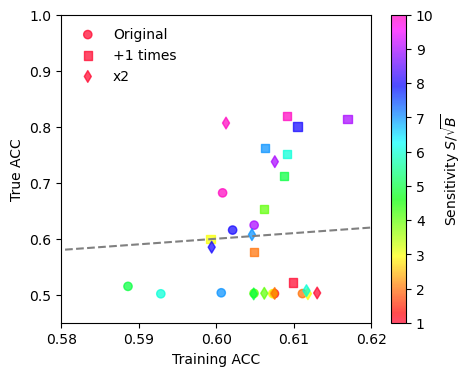

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(1,11), marker='s', label='+1 times')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(1,11), marker='d', label='x2')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_aug_1_x2.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

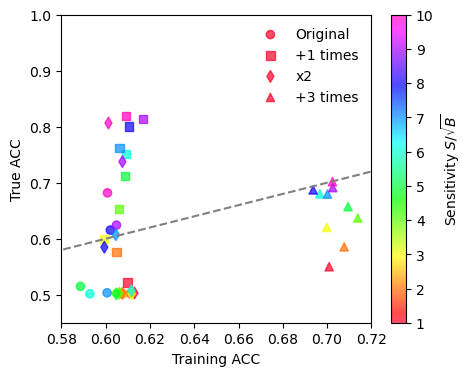

In [24]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(1,11), marker='s', label='+1 times')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(1,11), marker='d', label='x2')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 3', 'SB_{:.1f}_aug_3', range(1,11), marker='^', label='+3 times')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.72)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False)

plt.savefig('../figures/HVmodel_training_true_acc_aug_1_3_x2.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

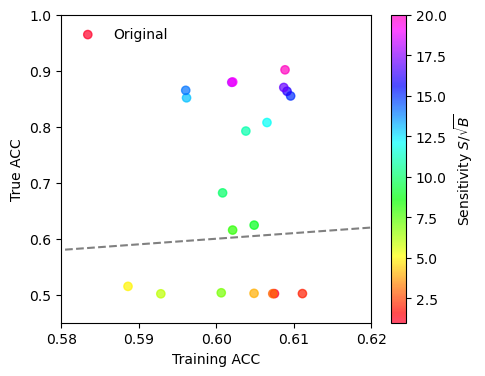

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,21), marker='o', label='Original')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_sensitivity_11_20.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

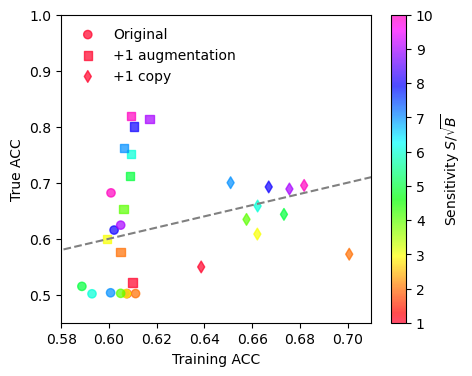

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(1,11), marker='s', label='+1 augmentation')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(1,11), marker='d', label='+1 copy')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.71)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_aug_1_copy_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Remove shuffle

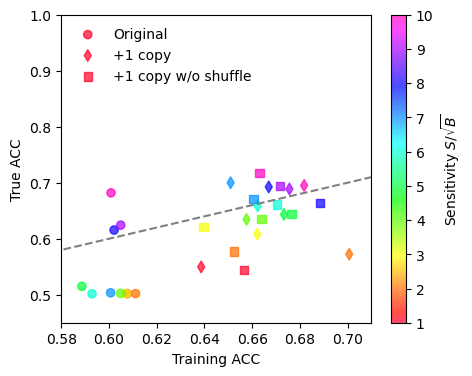

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(1,11), marker='d', label='+1 copy')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1, No shuffle', 'SB_{:.1f}_copy_1_no_shuffle_new', range(1,11), marker='s', label='+1 copy w/o shuffle')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.71)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_1_wo_shuffle.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

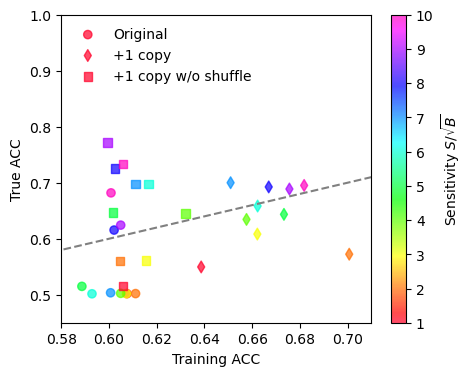

In [12]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(1,11), marker='d', label='+1 copy')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1, No shuffle', 'SB_{:.1f}_copy_1_no_shuffle_code', range(1,11), marker='s', label='+1 copy w/o shuffle')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.71)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_1_wo_shuffle_code.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Half + Copy

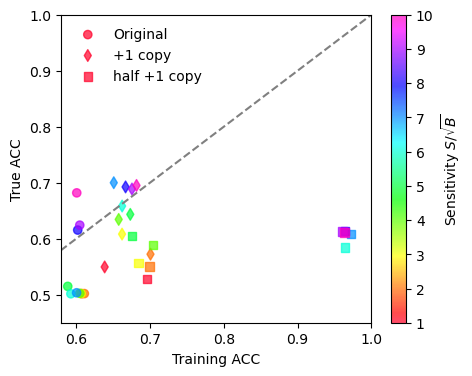

In [15]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(1,11), marker='d', label='+1 copy')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Half, Copy: 1', 'SB_{:.1f}_half_copy_1', range(1,11), marker='s', label='half +1 copy')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 1.0)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_half_copy_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Only augmented sample

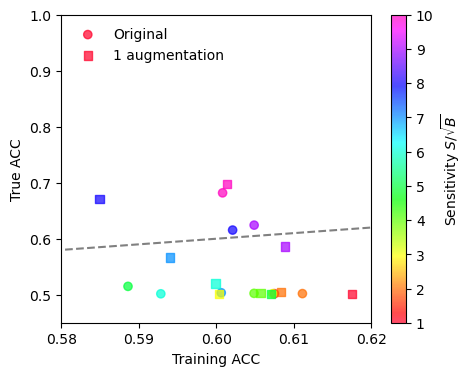

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Only Augmentation: 1', 'SB_{:.1f}_only_aug_1_new', range(1,11), marker='s', label='1 augmentation')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_only_aug_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

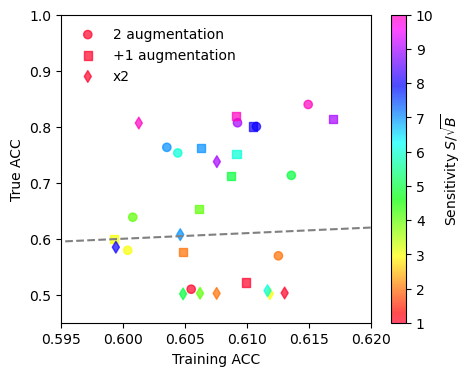

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Only Augmentation: 2', 'SB_{:.1f}_only_aug_2_new', range(1,11), marker='o', label='2 augmentation')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(1,11), marker='s', label='+1 augmentation')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(1,11), marker='d', label='x2')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.595, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_only_aug_2.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Smearing scale

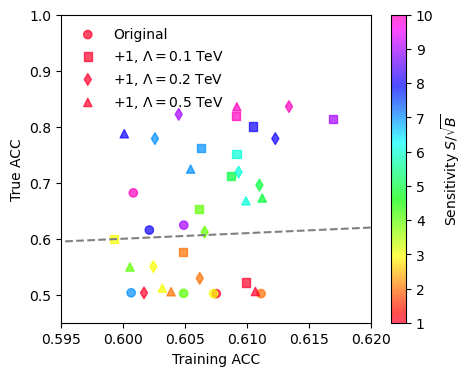

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1', 'SB_{:.1f}_aug_1_new', range(1,11), marker='s', label='+1, $\Lambda=0.1$ TeV')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1, Smearing: 0.2', 'SB_{:.1f}_aug_1_std_02_new', range(1,11), marker='d', label='+1, $\Lambda=0.2$ TeV')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Augmentation: 1, Smearing: 0.5', 'SB_{:.1f}_aug_1_std_05_new', range(1,11), marker='^', label='+1, $\Lambda=0.5$ TeV')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.595, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_aug_1_std_01_02_05.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Original + $x$ Copy, $x =0\sim 1$

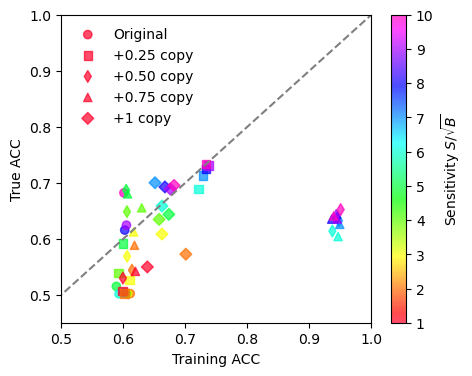

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 0.25', 'SB_{:.1f}_copy_0.25', range(1,11), marker='s', label='+0.25 copy')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 0.5', 'SB_{:.1f}_copy_0.5', range(1,11), marker='d', label='+0.50 copy')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 0.75', 'SB_{:.1f}_copy_0.75', range(1,11), marker='^', label='+0.75 copy')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(1,11), marker='D', label='+1 copy')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.5, 1.0)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_ratio.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Remove swapping label

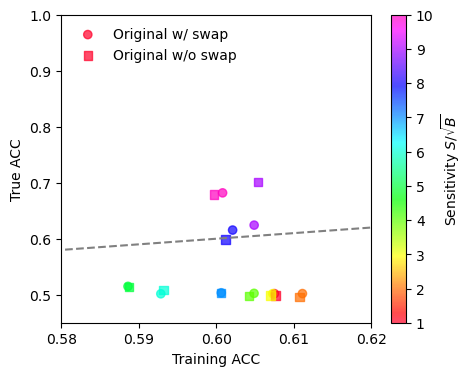

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_new', range(1,11), marker='o', label='Original w/ swap')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap', range(1,11), marker='s', label='Original w/o swap')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_no_swap.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

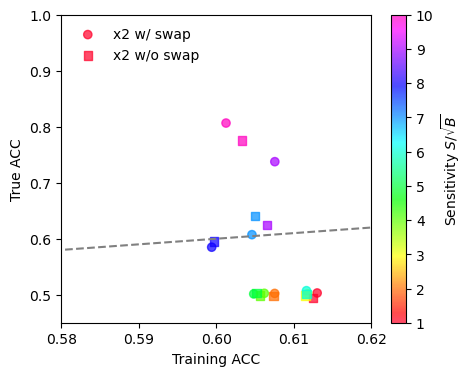

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_new', range(1,11), marker='o', label='x2 w/ swap')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Luminosity: x2', 'SB_{:.1f}_x2_no_swap', range(1,11), marker='s', label='x2 w/o swap')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_x2_no_swap.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

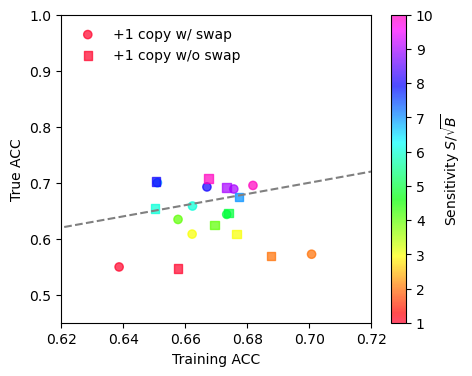

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_copy_1_new', range(1,11), marker='o', label='+1 copy w/ swap')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap', range(1,11), marker='s', label='+1 copy w/o swap')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.62, 0.72)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_1_no_swap.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Change model structure

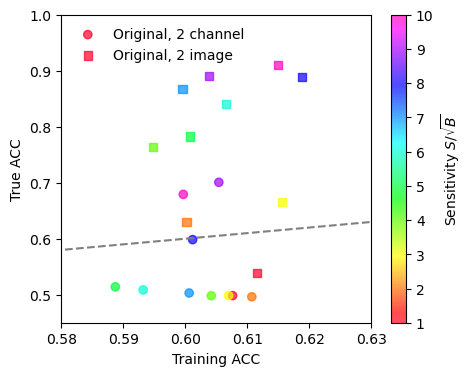

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap', range(1,11), marker='o', label='Original, 2 channel')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_2_image', range(1,11), marker='s', label='Original, 2 image')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.63)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_ZN_model.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

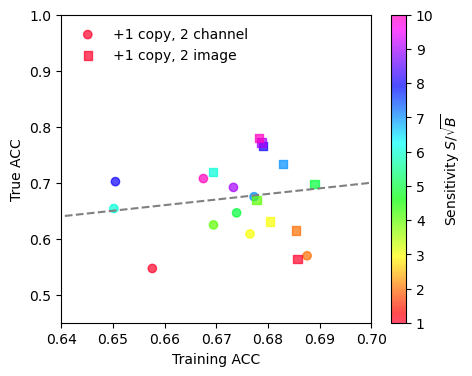

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap', range(1,11), marker='o', label='+1 copy, 2 channel')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image', range(1,11), marker='s', label='+1 copy, 2 image')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.64, 0.70)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_1_ZN_model.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

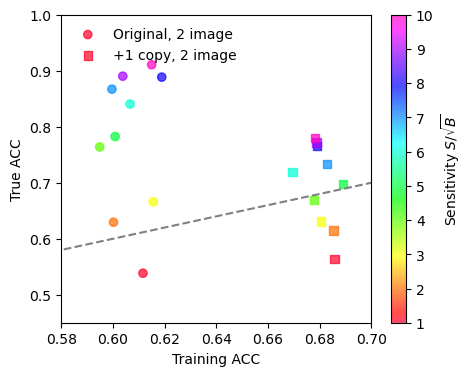

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_2_image', range(1,11), marker='o', label='Original, 2 image')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image', range(1,11), marker='s', label='+1 copy, 2 image')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.70)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_copy_1_ZN_model.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Tensorflow version

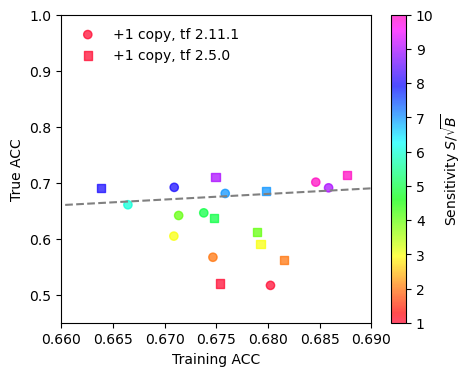

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

# scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap_2_image', range(1,11), marker='o', label='Original, 2 image')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap_2_image', range(1,11), marker='o', label='+1 copy, tf 2.11.1')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image_tf2.5', range(1,11), marker='s', label='+1 copy, tf 2.5.0')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.66, 0.69)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_copy_1_tf_250.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Early stopping patience

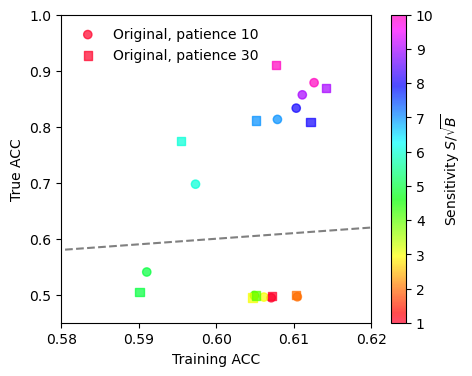

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_no_swap_2_image', range(1,11), marker='o', label='Original, patience 10')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_2_image_patience_30', range(1,11), marker='s', label='Original, patience 30')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.62)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_patience_30.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

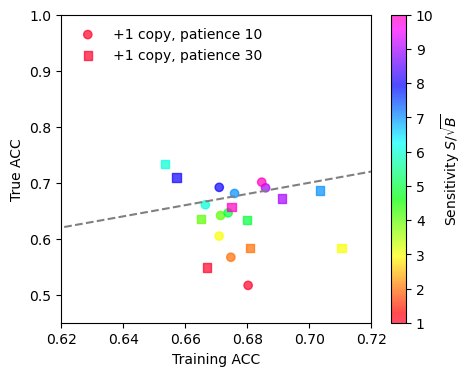

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_no_swap_2_image', range(1,11), marker='o', label='+1 copy, patience 10')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image_patience_30', range(1,11), marker='s', label='+1 copy, patience 30')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.62, 0.72)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_1_patience_30.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

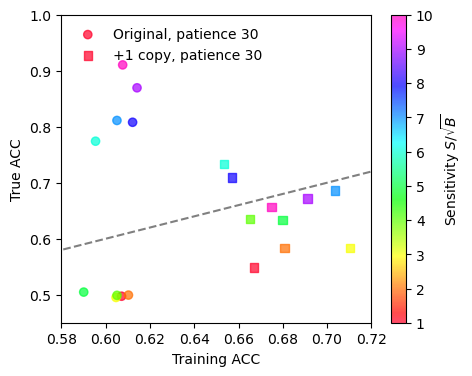

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_2_image_patience_30', range(1,11), marker='o', label='Original, patience 30')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image_patience_30', range(1,11), marker='s', label='+1 copy, patience 30')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.72)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_copy_1_patience_30.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Resolution $25 \times 25$

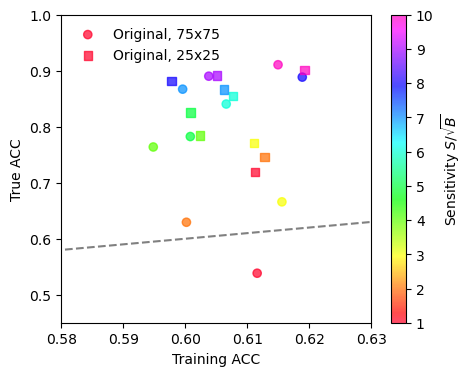

In [15]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}', 'SB_{:.1f}_2_image', range(1,11), marker='o', label='Original, 75x75')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Resolution: 25x25', 'SB_{:.1f}_2_image_25x25', range(1,11), marker='s', label='Original, 25x25')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.63)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

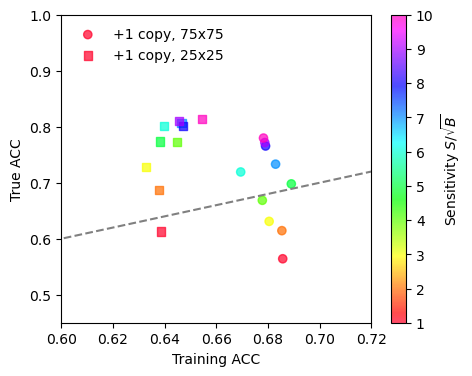

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Copy: 1', 'SB_{:.1f}_copy_1_2_image', range(1,11), marker='o', label='+1 copy, 75x75')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Resolution: 25x25, Copy: 1', 'SB_{:.1f}_copy_1_2_image_25x25', range(1,11), marker='s', label='+1 copy, 25x25')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.6, 0.72)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_copy_1_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

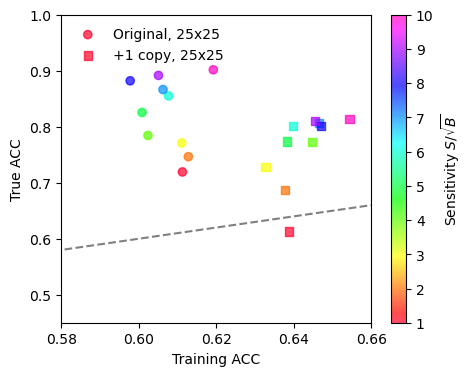

In [17]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Resolution: 25x25', 'SB_{:.1f}_2_image_25x25', range(1,11), marker='o', label='Original, 25x25')
scatter = plot_training_true_ACC(df, 'Sensitivity: {:.1f}, Resolution: 25x25, Copy: 1', 'SB_{:.1f}_copy_1_2_image_25x25', range(1,11), marker='s', label='+1 copy, 25x25')

ax.plot([0,1], [0,1], color='grey', linestyle='--')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Sensitivity $S / \sqrt{B}$')

ax.set_xlabel('Training ACC')
ax.set_ylabel('True ACC')

ax.set_xlim(0.58, 0.66)
ax.set_ylim(0.45, 1)

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_training_true_acc_origin_copy_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# Box plot

In [10]:
sensitivities = range(11)
ACC = [[]] * len(sensitivities)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC[id] = df[row]['ACC-true']


ACC_aug_1 = [[]] * len(sensitivities)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 1'
    model_name = f'SB_{sensitivity:.1f}_aug_1'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_aug_1[id] = df[row]['ACC-true']

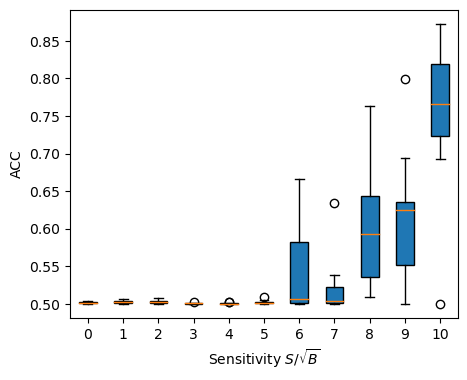

In [11]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))

ax.boxplot(ACC, vert=True, patch_artist=True, labels=sensitivities)
# ax.boxplot(ACC_aug_1, vert=True, patch_artist=True, labels=sensitivities)

# ax.set_xticks(range(1,1+len(sensitivities)), sensitivities)
ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

plt.show()